1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd

the numbers of minima are 2:
[[-0.0898  0.7127]
 [ 0.0898 -0.7127]]
the minima is in -1.0316


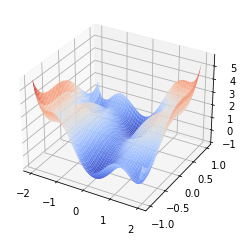

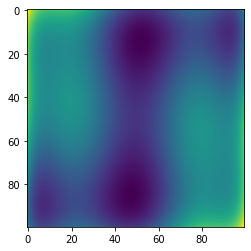

for the initial value of (0,0) the minimum founds is [0. 0.] with value in 0.0
this happen because in (0,0) we are in a saddle point, and the algorithm does not understand which direction has to take.


In [2]:
from mpl_toolkits.mplot3d import art3d
def f(z):
    x=z[0]
    y=z[1]
    f=pow(x,2)*(4-2.1*pow(x,2)+pow(x,4)/3)+x*y+pow(y,2)*(4*pow(y,2)-4)
    return f

fig = plt.figure()
ax=fig.add_subplot(111,projection='3d')

x=np.linspace(-2,2,100)
y=np.linspace(-1,1,100)
X,Y=np.meshgrid(x,y)
mn=[]
mn_value=[]
for i in np.arange(-2,2,0.5):
    for j in np.arange(-1,1,0.5):
        if (i,j)!=0:
            sol=optimize.minimize(f,x0=(i,j))
            value=sol.x
            mn.append(np.around(value,decimals=4))
            mn_value.append(f(np.around(value,decimals=4)))
            
mn=np.array(mn)
mn_value=np.array(mn_value)
mn=[mn[i] for i in range(len(mn_value)) if f(mn[i])==np.min(mn_value)]
mn_value=np.array(np.around(mn_value,decimals=4))

print('the numbers of minima are {}:\n{}'.format(len(np.unique(mn,axis=0)),np.unique(mn,axis=0)))

print('the minima is in',np.min(mn_value))

arg=np.argmin(mn_value)
ax.plot_surface(X,Y,f([X,Y]),cmap='coolwarm')
plt.show()



plt.imshow(f([X,Y]))
plt.show()
#######################

local_min=optimize.minimize(f,x0=(0,0))
val_0=local_min.x
print('for the initial value of (0,0) the minimum founds is {} with value in {}'.format(val_0,f(val_0)))
print('this happen because in (0,0) we are in a saddle point, and the algorithm does not understand which direction has to take.')

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

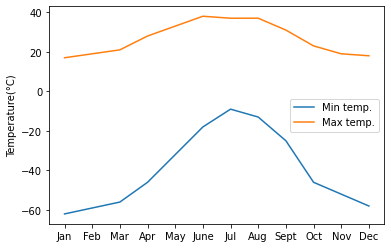

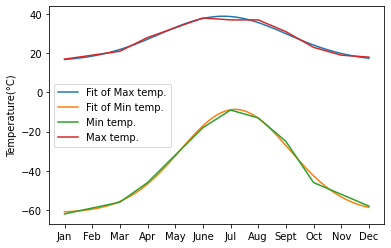

how we can see the curve fitting is fairly good
the correlaction coefficient for the maximum temperature is 0.9929147032024749 and for the minumim is 0.9972984476272351


In [9]:
Max=[17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18]
Min=[-62,-59,-56,-46, -32, -18, -9, -13, -25, -46, -52, -58]
month=['Jan','Feb','Mar','Apr','May','June','Jul','Aug','Sept','Oct','Nov','Dec']
month_1=[0,1,2,3,4,5,6,7,8,9,10,11]
plt.plot(month,Min,label='Min temp.')
plt.plot(month,Max,label='Max temp.')
plt.ylabel('Temperature(°C)')
plt.legend(loc='best')
plt.show()
def f(x,A,m,sigma,c):
    fun=c+A*np.exp(-0.5*(pow((x-m)/sigma,2)))
    return fun

popt_1, pcov_1 = optimize.curve_fit(f, month_1,Max,p0=[10,6,4,20],full_output=False)
popt_2, pcov_2 = optimize.curve_fit(f, month_1,Min,p0=[40,6,2,-60],full_output=False)

plot_x=np.linspace(0,11,100)
plt.plot(plot_x, f(plot_x, popt_1[0], popt_1[1],popt_1[2],popt_1[3]),label='Fit of Max temp.')
plt.plot(plot_x, f(plot_x, popt_2[0], popt_2[1],popt_2[2],popt_2[3]),label='Fit of Min temp.')
plt.plot(month,Min,label='Min temp.')
plt.plot(month,Max,label='Max temp.')
plt.ylabel('Temperature(°C)')
plt.legend(loc='best')
plt.show()

print('how we can see the curve fitting is fairly good')

fitt=np.array([f(x, popt_1[0], popt_1[1],popt_1[2],popt_1[3]) for x in month_1])
R=np.sqrt(1-(np.sum(pow(Max-fitt,2)))/(np.sum(pow(np.mean(Max)-Max,2))))

fitt_1=np.array([f(x, popt_2[0], popt_2[1],popt_2[2],popt_2[3]) for x in month_1])
R_1=np.sqrt(1-(np.sum(pow(Min-fitt_1,2)))/(np.sum(pow(np.mean(Min)-Min,2))))

print('the correlaction coefficient for the maximum temperature is {} and for the minumim is {}'.format(R,R_1))

3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

[ 1.57378770e+03 -8.63981168e-02 -2.09534466e-01  6.60476018e+01]
R2 = 0.9716485297113222 
R = 0.9857223390546256
Covariance matrix:
 [[ 1.         -0.07963076]
 [-0.07963076  1.        ]]
Chi2 1351.283274945605
p-value 0.0
the result is very poor


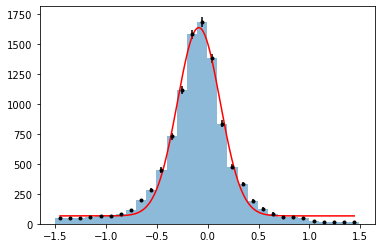

In [12]:
from scipy import stats
file=np.load('residuals_261.pkl',allow_pickle=True)
data=file.tolist()
df=pd.DataFrame(data)
df=df[np.abs(df['residuals'])<1.5]
counts,bins,patches=plt.hist(x=df['residuals'],bins=30,alpha  = 0.5, rwidth = 1 )
binc=0.5*(bins[1:]+bins[:-1])
erry=np.sqrt(counts)
plt.errorbar(binc,counts,yerr=erry,fmt='.',color='black')

def f(x,A,m,sigma,c):
    fun=c+A*np.exp(-0.5*(pow((x-m)/sigma,2)))
    return fun

popt,pcov=optimize.curve_fit(f,binc,counts,p0=[5,0,2,0],full_output=False)
print(popt)
bin_c=np.linspace(binc.min(), binc.max(),10000)
plt.plot(bin_c,f(bin_c,popt[0],popt[1],popt[2],popt[3]),'red')
y_hat=f(binc,popt[0],popt[1],popt[2],popt[2])

ssr = np.sum((y_hat-counts)**2)
tss = np.sum((np.mean(counts) - counts)**2)

rsq = 1 - ssr / tss

print("R2 =", rsq, "\nR =", np.sqrt(rsq))
print("Covariance matrix:\n", np.corrcoef(binc,counts)) 


ndof=len(binc)-1
sigma_y = np.sqrt(np.abs(counts)) 
chi2 = np.sum(pow(counts-y_hat,2)/pow(sigma_y,2))
print('Chi2',chi2)
pvalue = 1. - stats.chi2.cdf(chi2, ndof)
print('p-value',pvalue)
print('the result is very poor')

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

the best parameters are a=9.988133689347347,b=2.908245053700507,c=9.384114873624496


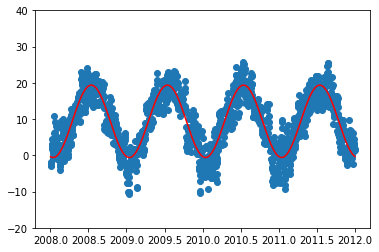

the best parameters are a=-9.982163030057569,b=1.0014441175875917,c=-18.471854508755086,d=9.398125511798181


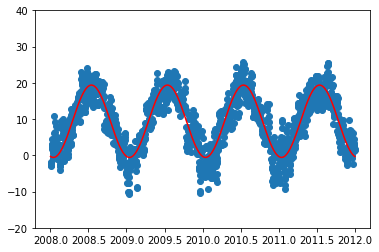

SSR for f(x) is 34359.85859996652 ad for g(x) is 34352.794054346676:
CL: 0.584 , additional parameter necessary: NO


In [5]:
file=open('munich_temperatures_average_with_bad_data.txt','r')


a=[[float(num) for num in line.split() ] for line in file ]
a=[a[i][:] for i in range(len(a)) if a[i][0]<2012 and a[i][0]>2008]

temp= np.zeros(len(a))
t=np.zeros(len(a))
for i in range(len(a)):
    t[i]=a[i][0]
    temp[i]=a[i][1]
def f(t,a,b,c):
    fun=c+a*np.cos((2*np.pi*t)+b)
    return fun


popt,pcov=optimize.curve_fit(f,t,temp,p0=[-2,-2,0])#,full_output=False)
print('the best parameters are a={},b={},c={}'.format(popt[0],popt[1],popt[2]))
plt.plot(t, f(t, popt[0], popt[1],popt[2]),'r')
plt.scatter(t,temp)
plt.ylim(-20,40)
plt.show()
#########################################
def f_1(t,a,b,c,d):
    fun_1=d+a*np.cos((2*np.pi*t*b)+c)
    return fun_1
popt_1,pcov_1=optimize.curve_fit(f_1,t,temp,p0=[5,1,0,10],full_output=False)
print('the best parameters are a={},b={},c={},d={}'.format(popt_1[0],popt_1[1],popt_1[2],popt_1[3]))
plt.plot(t, f_1(t, popt_1[0], popt_1[1],popt_1[2],popt_1[3]),'r')
plt.scatter(t,temp)
plt.ylim(-20,40)
plt.show()
#########################################

ssr_1=np.sum((f(t, popt[0], popt[1],popt[2]) - temp)**2)
n_dof_1=2
n_dof_2=3
ssr_2=np.sum((f_1(t, popt_1[0], popt_1[1],popt_1[2],popt_1[3]) - temp)**2)
print("SSR for f(x) is {} ad for g(x) is {}:".format(ssr_1, ssr_2))

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL
cl_1_vs_2 = Ftest(ssr_1, ssr_2, n_dof_1, n_dof_2, len(t), verbose=True)

the best parameters are a=-9.671613711002005,b=0.9997396586904976,c=3.05489085283303,d=9.051352257952463


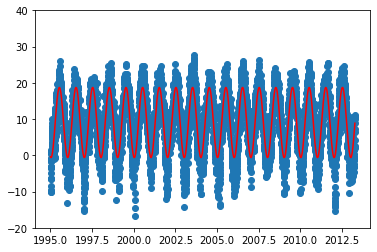

SSR for f(x) is 695293.1819542269 ad for g(x) is 694186.2523473827:
CL: 0.001 , additional parameter necessary: YES


In [6]:
#i repeat the second question with all the dataset

file=open('munich_temperatures_average_with_bad_data.txt','r')

a_1=[[float(num) for num in line.split() ] for line in file ]
def f_1(t,a,b,c,d):
    fun_1=d+a*np.cos((2*np.pi*t*b)+c)
    return fun_1

temp= np.zeros(len(a_1))
t=np.zeros(len(a_1))
for i in range(len(a_1)):
    t[i]=a_1[i][0]
    temp[i]=a_1[i][1]

popt_1,pcov_1=optimize.curve_fit(f_1,t,temp,p0=[5,1,0,10],full_output=False)
print('the best parameters are a={},b={},c={},d={}'.format(popt_1[0],popt_1[1],popt_1[2],popt_1[3]))
plt.plot(t, f_1(t, popt_1[0], popt_1[1],popt_1[2],popt_1[3]),'r')
plt.scatter(t,temp)
plt.ylim(-20,40)
plt.show()
#########################################

ssr_1=np.sum((f(t, popt[0], popt[1],popt[2]) - temp)**2)
n_dof_1=2
n_dof_2=3
ssr_2=np.sum((f_1(t, popt_1[0], popt_1[1],popt_1[2],popt_1[3]) - temp)**2)
print("SSR for f(x) is {} ad for g(x) is {}:".format(ssr_1, ssr_2))

def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL
cl_1_vs_2 = Ftest(ssr_1, ssr_2, n_dof_1, n_dof_2, len(t), verbose=True)
